# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [30]:
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    sns.set(rc={'figure.figsize':(12,8)})
    sns.distplot(sample)
    
    # Sample Size
    n = len(sample)
                
    # Sample mean (x̄) using NumPy mean()
    x_bar = np.mean(sample)
    print("Sample mean:", x_bar)
    # Sample Standard Deviation (sigma) using Numpy
    sigma = np.std(sample, ddof=1)
    print("Sample stdev:", sigma)   
    # Degrees of freedom
    df = n - 1
                
    # Calculate the critical t-value
    t_crit = np.round(stats.t.ppf(1-alpha, df=df), 3)
                
    # Calculate the t-value and p-value      
    t_stat, p_val = stats.ttest_1samp(a = sample, popmean=popmean)
    t_stat = round(t_stat, 4)
    print("Unrounded p_val:", p_val)
    p_val = round(p_val, 4)
    # Determine significance
    if p_val < alpha:
        print("Results significant. H0 rejected. P_value = {} which is less than alpha: {}".format(p_val, alpha))
        print("The t-value {} is higher than the t critical value of {}".format(t_stat, t_crit))
    else:
        print("Results not significant. HA rejected. P_value = {} which is greater than alpha {}".format(p_val, alpha))
        print("The t-value {} is lower than the t critical value of {}".format(t_stat, t_crit))

    # return results
    return t_stat, t_crit, p_val

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

Sample mean: 81.80000000000001
Sample stdev: 5.9216818379134235
Unrounded p_val: 1.0053355594452825e-10
Results significant. H0 rejected. P_value = 0.0 which is less than alpha: 0.05
The t-value 12.6876 is higher than the t critical value of 1.729
t statistic: 12.6876, p-val: 0.0


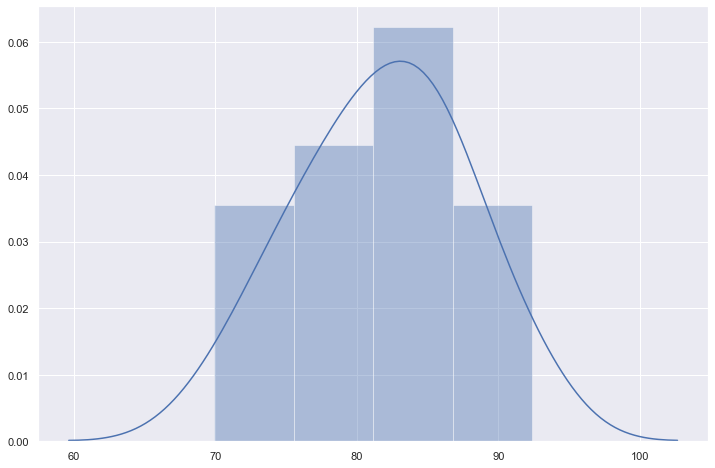

In [31]:
# Null hypothesis: the population mean is greater than or equal to the sample mean,
# or the online courses had no benefitting effect on scores
# H0 : mu >= x_bar
# Alternative hypothesis: the sample mean is greater than the population mean,
# or the online courses did have a positive effect on scores
# HA : x_bar > mu
import numpy as np
import seaborn as sns
from scipy import stats

sample = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
  78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
popmean = 65
alpha = 0.05

t_stat, t_crit, p_val = one_sample_ttest(sample, popmean, alpha)
print("t statistic: {}, p-val: {}".format(t_stat, p_val))

Sample mean: 81.30000000000001
Sample stdev: 5.521536780738914
Unrounded p_val: 5.083361606682268e-11
Results significant. H0 rejected. P_value = 0.0 which is less than alpha: 0.05
The t-value 13.2021 is higher than the t critical value of 1.729
t statistic: 13.2021, p-val: 0.0


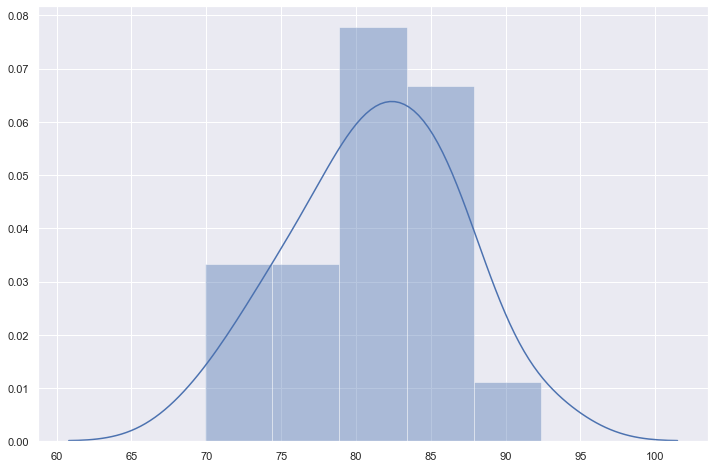

In [32]:
sample = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
  78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
popmean = 65
alpha = 0.05

t_stat, t_crit, p_val = one_sample_ttest(sample, popmean, alpha)
print("t statistic: {}, p-val: {}".format(t_stat, p_val))

It is interesting to note here that the t statistic actually increased as a result of the change, despite the fact that it lowered the sample mean. This is because it also reduced the sample standard deviation of the sample, which affected the point estimate of the population standard deviation used to calculate the t-score.

In [36]:
cohens_d = (np.mean(sample) - popmean) / np.std(sample, ddof=1)
cohens_d

2.952076685762597

The Cohen's d value above of 2.95 means that you would have to go that many standard deviations away from the population mean to get to the population mean represented by the sample, which is a very large effect indeed, as many consider 0.8 to be a large value. What this means in relation to our significance level is that not only are the results significant, but the effect size is consequential.

## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 